In [130]:
from openqaoa.problems import Knapsack

knapsack_prob = Knapsack(values=[4, 1, 4, 2, 2],weights=[4, 2, 4, 1, 3],weight_capacity=7,penalty=8)
print(knapsack_prob.problem_instance)
knapsack_qubo = knapsack_prob.qubo
knapsack_hamiltonian = knapsack_qubo.hamiltonian

{'problem_type': 'knapsack', 'values': [4, 1, 4, 2, 2], 'weights': [4, 2, 4, 1, 3], 'weight_capacity': 7, 'penalty': 8, 'n_items': 5}


In [135]:
from openqaoa.utilities import ground_state_hamiltonian
energy, configuration = ground_state_hamiltonian(knapsack_hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")

Ground State energy: -7.0, Solution: ['00011010', '00001110']


In [138]:
from openqaoa.utilities import plot_graph
from openqaoa.problems import MaximumCut
from openqaoa import QAOA  
from openqaoa.backends import create_device
from openqaoa.qaoa_components import QAOADescriptor

#REFERENCE FROM https://github.com/fall-fest-latino/escuela-de-computacion-cuantica-2023/blob/main/dia06/Intro_QAOA_Ezequiel_Rodriguez_Chiacchio.ipynb

q = QAOA()

# optionally configure the following properties of the model

# device
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q.set_device(qiskit_device)

# circuit properties
q.set_circuit_properties(p=15, param_type='standard', init_type='ramp', mixer_hamiltonian='x')
print(q.circuit_properties)
# backend properties (already set by default)
q.set_backend_properties(prepend_state=None, append_state=None)

# classical optimizer properties
q.set_classical_optimizer(method='Powell', maxiter=200, tol=0.001,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

q.compile(knapsack_qubo)
q.optimize()

In [143]:
print(q.result.optimized)
print()
print(q.result.lowest_cost_bitstrings())

{'angles': [-0.990920034933, 0.674768124854, -0.329101959297, 1.130734746637, 1.632160316233, -0.066965984453, -0.376257505629, 3.11557059376, -0.13438631554, 0.036186241045, -1.450849119907, 0.160728085077, 0.176186241045, 0.244202154772, -0.685000025156, 1.385, -0.163033974844, 0.631979637511, 0.231531616165, -0.953034], 'cost': 131.4, 'measurement_outcomes': {'00100010': 6, '00101000': 1, '00011010': 3, '11011100': 1, '00101001': 1, '01000011': 4, '00011111': 1, '01011010': 1, '11001100': 2, '10110100': 2, '00100000': 3, '00110011': 1, '10001001': 3, '10001100': 1, '11110100': 1, '01100000': 2, '01110001': 1, '10011001': 1, '00111110': 1, '10010101': 2, '11101100': 2, '10000101': 1, '01000001': 2, '01111010': 3, '11000011': 1, '01010111': 2, '11101000': 1, '11010110': 3, '11010000': 1, '11100001': 1, '11011000': 1, '10010001': 1, '11011110': 1, '01010100': 1, '10010010': 2, '00011100': 1, '10101010': 1, '10011000': 1, '10000011': 2, '10010000': 1, '00010111': 1, '10011111': 2, '1001

states kept: 40


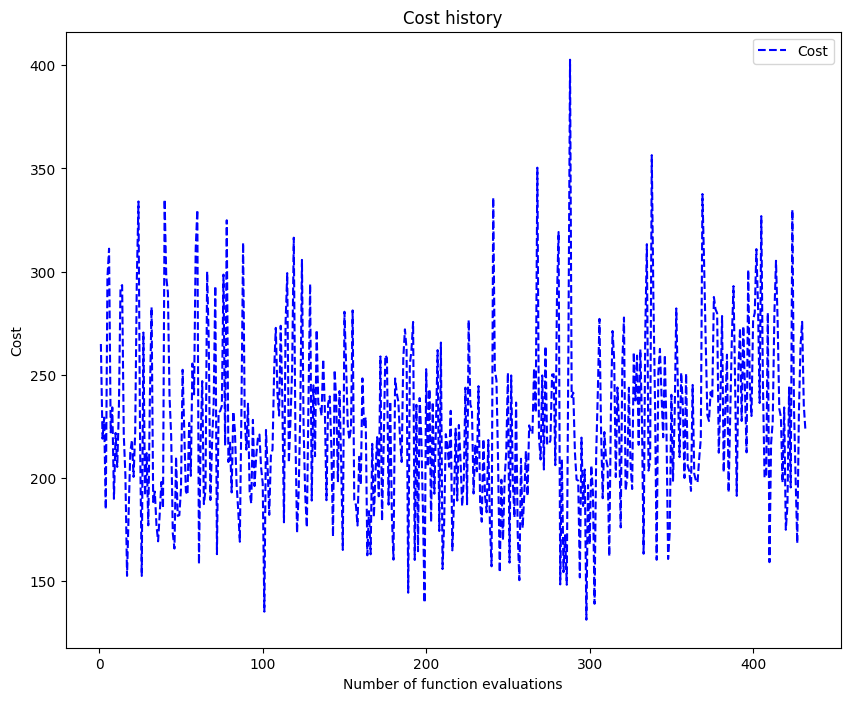

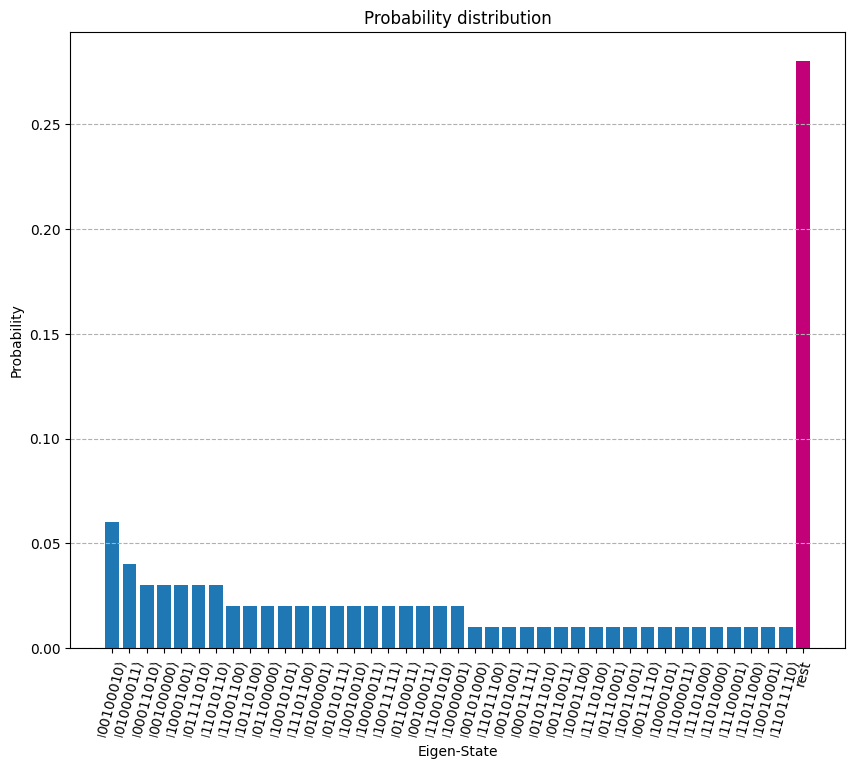

In [141]:
q.result.plot_cost()
q.result.plot_probabilities()

In [73]:
import json

# Paso 1: Abrir el archivo JSON
with open('../exp1/problem1/prob1_4-standard-ramp-x-Powell.json', 'r') as file:
    # Paso 2: Cargar el contenido del archivo JSON
    data = json.load(file)

# Ahora, 'data' contiene la información del archivo JSON y puedes trabajar con ella en tu notebook.

In [71]:
#data

states kept: 40


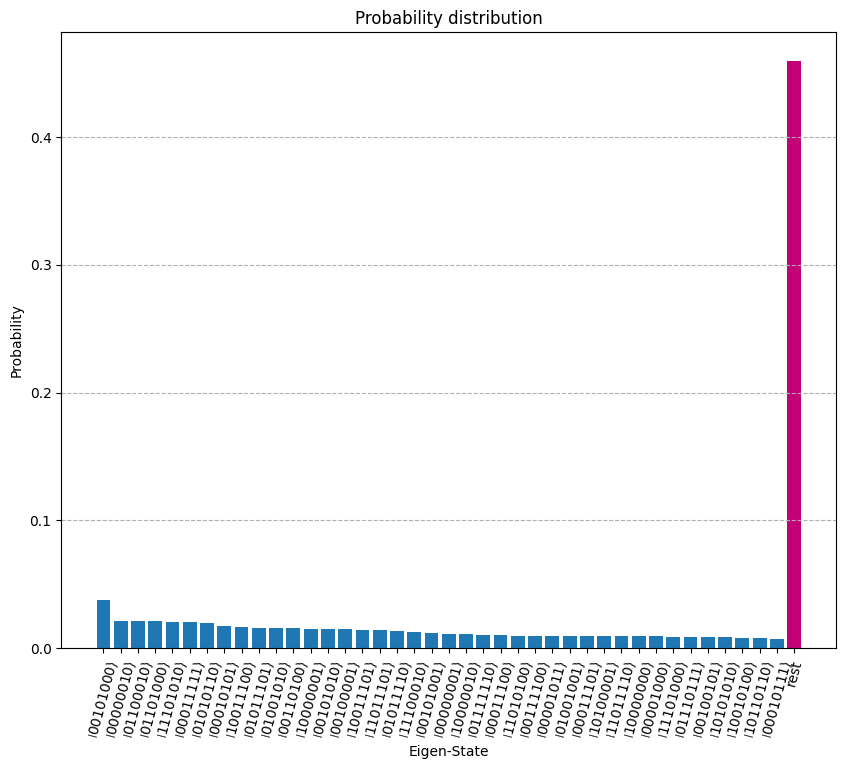

In [74]:
from openqaoa.algorithms import QAOAResult

result = QAOAResult.from_dict(data)
result.plot_probabilities()